In [9]:
# HIDDEN
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

If we know more about the shape of a distribution than just its average and SD, we might have additional tools to work with it. This section investigates one famous shape of a distribution: the bell curve of the normal distribution.

## The Normal Distribution

Some probability histograms are roughly bell shaped, as we have seen. Some distributions of data are also bell shaped, to a rough approximation. For example, here is a histogram of the heights of over 1,000 women. As you can see, it is roughly bell shaped. 

In [16]:
# HIDDEN
baby = Table.read_table('baby.csv')
heights = baby.select('mat_ht')
_ = heights.relabel('mat_ht','height')

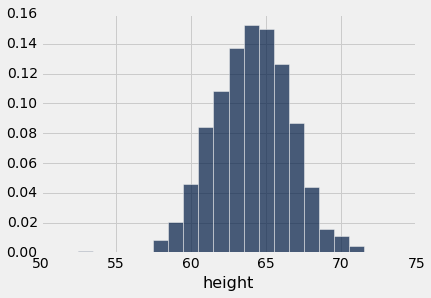

In [10]:
heights.hist(bins=np.arange(52.5,72.6,1), normed=True)

In [11]:
np.mean(heights['height'])

64.049403747870528

In [12]:
np.std(heights['height'])

2.5250254409674375

The heights of the women have an average of just about 64 inches, and an SD of just about 2.5 inches. The range "average $\pm$ 2 SDs" is roughly 59 inches to 69 inches. Chebychev's inequality says that this range should contain at least 75% of the data, regardless of the shape of the distribution. For this histogram, the interval 59 inches to 69 inches contains quite a bit more than 75% of the data. 

Is it possible to say something more precise than "quite a bit more," by examining the bell more closely? Let us explore this question, by studying a smooth curve that looks like a bell.

###The standard normal curve

The bell shaped curve of probability and statistics has an impressive equation. But for now, it is best to think of it as a smoothed version of a histogram of a variable that has been measured in standard units.

$$
\phi(z) = {\frac{1}{\sqrt{2 \pi}}} e^{-\frac{1}{2}z^2}, ~~ -\infty < z < \infty
$$

In order to work with and display this equation, we need to import some additiona modules.

In [14]:
import pylab
import math
from scipy import stats

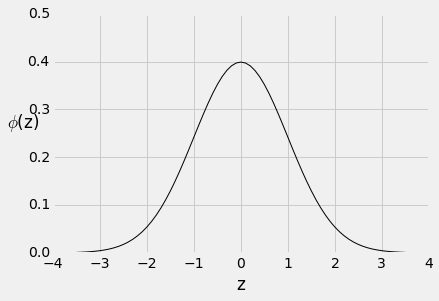

In [21]:
# standard normal probability density function (pdf)

z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
plots.ylim(0, 0.5)
plots.xlabel('z')
plots.ylabel('$\phi$(z)', rotation=0)

As always when you examine a new histogram, start by looking at the horizontal axis. On the horizontal axis of the standard normal curve, the values are standard units. Here are some properties of the curve; some are apparent by observation, and others require a considerable amount of mathematics to establish.

- The total area under the curve is 1. So you can think of it as a histogram drawn to the density scale.

- The curve is symmetric about 0. So if a variable has this distribution, its mean and median are both 0.

- The points of inflection of the curve are at -1 and +1. 

- If a variable has this distribution, its SD is 1. The normal curve is one of the very few distributions that has an SD so clearly identifiable on the histogram.

Since we are thinking of the curve as a smoothed histogram, we will want to represent proportions of the total amount of data by areas under the curve. Areas under smooth curves are often found by calculus, using a method called integration. It is a remarkable fact of mathematics, however, that the standard normal curve cannot be integrated in any of the usual ways of calculus. Therefore, areas under the curve have to be approximated. That is why almost all statistics textbooks carry tables of areas under the normal curve; it is also why all statistical systems, including the ``stats`` module of Python, include methods that provide excellent approximations to those areas.

**The standard normal cumulative distribution function (cdf)**

The fundamental function for finding areas under the normal curve is ``stats.norm.cdf``. It takes a numerical argument and finds all the area under the curve to the left of that number. Formally, it is called the "cumulative distribution function" of the standard normal curve. That rather unwieldy mouthful is abbreviated as cdf.

Let us use this function to find the area to the left of $z=1$ under the standard normal curve.

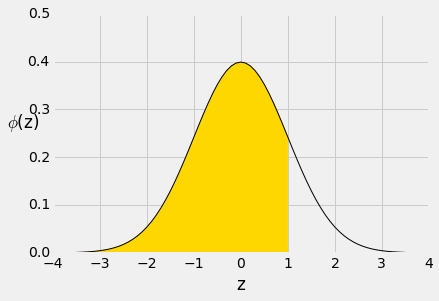

In [12]:
z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
w = np.arange(-3.5, 1.1, 0.1)
plots.fill_between(w, stats.norm.pdf(w), color='gold')
plots.ylim(0, 0.5)
plots.xlabel('z')
plots.ylabel('$\phi$(z)', rotation=0)

In [13]:
stats.norm.cdf(1)

0.84134474606854293

That's about 84%. We can apply the function ``stats.norm.cdf`` to find other areas under the curve too. For example, suppose we want to find the area between $-1$ and 1:

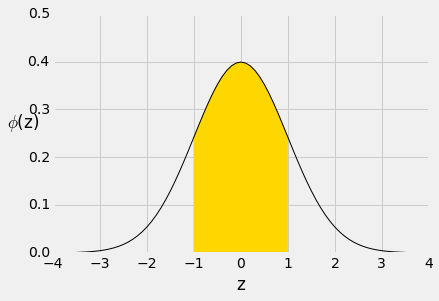

In [13]:
"""Area under the standard normal curve, between -1 and 1"""

z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
x = np.arange(-1, 1.1, 0.1)
plots.fill_between(x, stats.norm.pdf(x), color='gold')
plots.ylim(0, 0.5)
plots.xlabel('z')
plots.ylabel('$\phi$(z)', rotation=0)

We can start with the area to the left of 1:

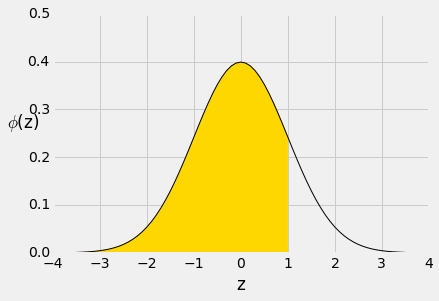

In [15]:
z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
w = np.arange(-3.5, 1.1, 0.1)
plots.fill_between(w, stats.norm.pdf(w), color='gold')
plots.ylim(0, 0.5)
plots.xlabel('z')
plots.ylabel('$\phi$(z)', rotation=0)

and subtract from it the area to the left of $-1$:

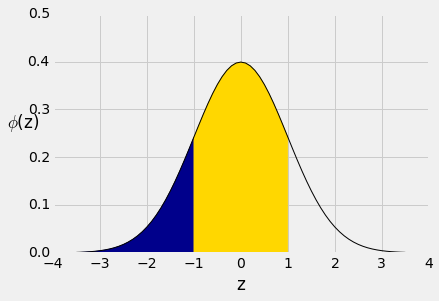

In [16]:
z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
w = np.arange(-3.5, -0.9, 0.1)
plots.fill_between(w, stats.norm.pdf(w), color='darkblue')
w = np.arange(-1, 1.1, 0.1)
plots.fill_between(w, stats.norm.pdf(w), color='gold')
plots.ylim(0, 0.5)
plots.xlabel('z')
plots.ylabel('$\phi$(z)', rotation=0)

Here is the calculation using ``stats.norm.cdf``.

In [17]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

We can use the symmetry of the curve to check that this answer makes sense. The area to the left of 1 is about 84%, as we saw earlier. Since the total area under the curve is 1 or 100%, the unshaded area in the graph above is about 16%. Since the curve is symmetric, the blue area is about 16% too. So the total area in the two tails is about 32%, and the yellow central area is therefore just about 68%.

By a similar calculation, we see that the area between $-2$ and 2 is about 95%.

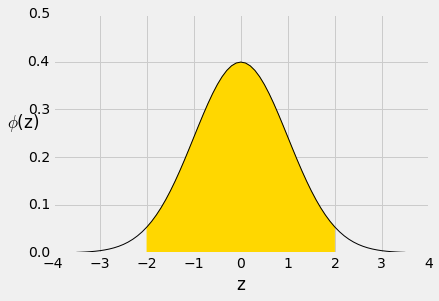

In [18]:
z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
w = np.arange(-2, 2.1, 0.1)
plots.fill_between(w, stats.norm.pdf(w), color='gold')
plots.ylim(0, 0.5)
plots.xlabel('z')
plots.ylabel('$\phi$(z)', rotation=0)

In [19]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

In other words, if a histogram is roughly bell shaped, the proportion of data in the range "average $\pm$ 2 SDs" is about 95%. That is indeed "quite a bit more" than Chebychev's lower bound of 75%, as we had observed earlier.

**Percentiles of the standard normal curve**

We say that the value $z=1$ roughly the *84th percentile* of the standard normal curve, since 84% of the area under the curve is to the left of 1. The informal terminology is that the point $z=1$ is roughly the *84 percent point* of the curve.

Percentiles, or percent points, can be found using the ``stats.norm.ppf`` function, which takes a proportion as its argument, and returns the point that has that proportion of the area to the left of it.

In [21]:
stats.norm.ppf(0.84)

0.99445788320975304

This is just about 1, as we expect. Notice that percentiles below 50% correspond to negative values of $z$. The 40th percentile of the distribution is approximately $z = -0.25$.

In [22]:
stats.norm.ppf(.4)

-0.25334710313579972

**The normal approximation to data**

There are many normal curves, one corresponding to each pair of mean and SD. Their horizontal axes can all be converted to standard units, turning them all into the standard normal curve that we have been studying. But we can study them directly too.

** Example 1.**
A distribution of weights follows the normal curve very closely, with mean 160 pounds and SD 20 pounds. Approximately what is the 75th percenile of the weights?

From our earlier observations, 160 pounds is the 50th percentile of the weights, and 180 pounds is roughly the 84th. So the 75th must be somewhere in the interval 160 pounds to 180 pounds. We can find it by calling ``stats.norm.ppf`` and including the mean and SD as its second and third argument respectively:

In [23]:
stats.norm.ppf(0.75, 160, 20)

173.48979500392164

Approximately 75% of the weights are less than 173.49. This is consistent with the graph below.

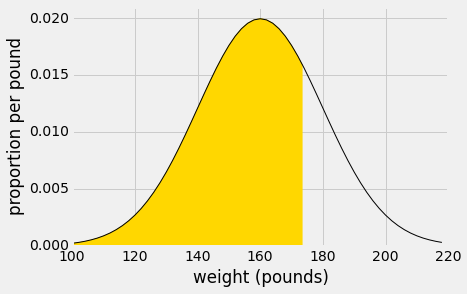

In [24]:
m = 160
s = 20
x = np.arange(m-3*s, m+3*s, 2)
plots.plot(x, stats.norm.pdf(x, m, s), color='k', lw=1)
w = np.arange(m-3*s, stats.norm.ppf(0.75, m, s), 0.1)
plots.fill_between(w, stats.norm.pdf(w, m, s), color='gold')
plots.ylim(0, 0.021)
plots.xlabel('weight (pounds)')
plots.ylabel('proportion per pound')

It is worth noting that this problem can also be solved by finding the answer in standard units first, and then converting the standard units into pounds. When ``stats.norm.ppf`` is called without a mean or an SD as arguments, the default is that the curve is in standard units.

In [27]:
stats.norm.ppf(0.75)*20 + 160

173.48979500392164

**Example 2.**

About what percent of the weights are more than 130 pounds?

To answer this, we can use ``stats.norm.cdf`` by including the mean and SD as arguments, and recalling that it finds all the area to the *left* of its first argument.

In [28]:
1 - stats.norm.cdf(130, 160, 20)

0.93319279873114191

This problem can also be solved by first converting 130 pounds to standard units and then calling ``stats.norm.cdf`` with its default curve, the standard normal:

In [31]:
z = (130-160)/20
1 - stats.norm.cdf(z)

0.93319279873114191

(0, 0.5)

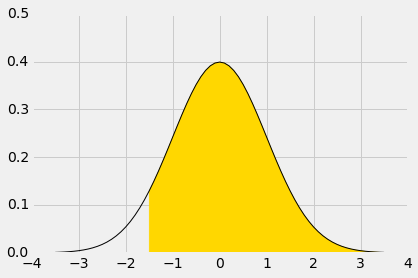

In [32]:
z = np.arange(-3.5, 3.6, 0.1)
plots.plot(z, stats.norm.pdf(z), color='k', lw=1)
w = np.arange(-1.5, 3.6, 0.1)
plots.fill_between(w, stats.norm.pdf(w), color='gold')
plots.ylim(0, 0.5)

When working with the normal curve, it is a good idea to make rough sketches and shade the relevant areas. That makes it easier to see what has to be calculated, and also to see whether the answers make sense.